# Training Session

In [1]:
import pickle

from build_vocab import *
from build_answers import *

In [2]:
# train2014
answers_path = '/home/ubuntu/dotCuda/notebook/answers.pkl'
with open(answers_path, 'rb') as f:
    answers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
# val2014
answers_path = '/home/ubuntu/dotCuda/notebook/valanswers.pkl'
with open(answers_path, 'rb') as f:
    valanswers = pickle.load(f)

vocab_path = '../../dotCuda/notebook/valvocab.pkl'
with open(vocab_path, 'rb') as f:
    valvocab = pickle.load(f)

In [3]:
from dataset import *

train_dataset = COCODataset(vocab=vocab, answers=answers).subset(count=150)
val_dataset = COCODataset(vocab=valvocab, answers=valanswers).subset(count=150)

loading VQA annotations and questions into memory...
0:00:10.091633
creating index...
index created!
Getting subset of length 150 out of 443757
loading VQA annotations and questions into memory...
0:00:09.618458
creating index...
index created!
Getting subset of length 150 out of 443757


### Network Model

In [4]:
# import network 
from network_v6 import *

In [5]:
import torch
device = torch.device('cuda')

vocab_size = len(vocab)
model = ConcatNet(vocab_size, with_attention=False).to(device)


### Trainer Class

In [6]:
# import trainer
from trainer import VQATrainer

trainer = VQATrainer(model, device)

### Train! - on frozen resnet

In [7]:
trained_model, statistics = trainer.train(train_dataset, val_dataset, save_every=50000, batch_size=128, learnrate=1, shuffle=False, collate_fn=collate, e_break=80000, v_break=10000, epoch=1)

Epoch 0 of 1
  Training...
   >> Epoch finished with loss 34.59537 and accuracy 0.007 in 9.5181s
  Validating...
   >> Epoch finished with loss 49.86931 and accuracy 0.202 in 9.5626s


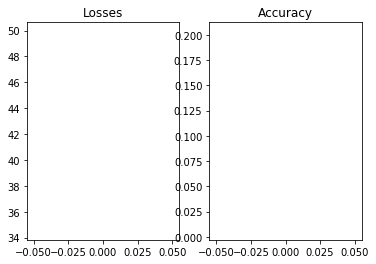

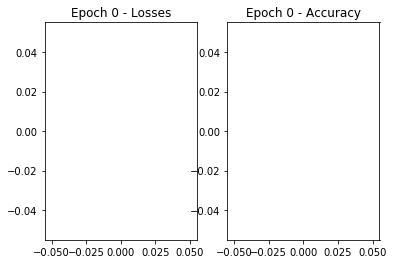

In [8]:
import pickle

# with open('stats.st', 'rb') as statfile:
#     statistic = pickle.load(statfile)
    
# #print(statistic)

# #trainer.plot_over_epoch()
# from trainer import VQATrainer

# trainer = VQATrainer(None, None)
# trainer.statistics = statistic

trainer.plot_over_epoch()

In [9]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import random

# device = torch.device('cuda')
# vocab_size = len(vocab)
# model = ConcatNet(vocab_size, with_attention=False).to(device)

# state_dict = torch.load('model_epoch0.pt')
# model.load_state_dict(state_dict)
    

In [10]:
import random

for idx in [random.randint(0, 4e5) for i in range(8)]:
    print('\nqn no', idx)
    qns, img, ans = collate([train_dataset[idx]])
    print(ans)
    output = model(img.cuda(), qns.long().cuda())
    _, pred = output.topk(10)
    # print(qns, pred)

    #pil_img = transforms.ToPILImage()(img)
    #plt.imshow(pil_img)
    qnss = ' '.join([vocab.idx2word[i.item()] for i in qns.data])
    ans_ = ' / '.join([answers.idx2ans[j.item()] for j in pred[0]])
    lbl = ' - '.join([answers.idx2ans[k.item()] for k in ans[0]])
    print('question:', qnss)
    print('answer:', ans_)
    print('label:', lbl)
    ans = ans.cuda()
    print('accuracy', trainer.accuracy_fn(output.detach(), ans))
    print('loss', trainer.get_losses(output, ans))


qn no 135801


IndexError: list index out of range

### Train - on unfrozen resnet

In [ ]:
trainer.plot_over_epoch()

In [ ]:
import random

for idx in range(8):#[random.randint(0, 8) for i in range(8)]:
    print('\nqn no', idx)
    qns, img, ans = collate([train_dataset[idx]])
    output = model(img.cuda(), qns.long().cuda())
    _, pred = output.topk(10)
    # print(qns, pred)

    #pil_img = transforms.ToPILImage()(img)
    #plt.imshow(pil_img)
    qnss = ' '.join([vocab.idx2word[i.item()] for i in qns.data])
    ans_ = ' / '.join([answers.idx2ans[j.item()] for j in pred[0]])
    lbl = ' - '.join([answers.idx2ans[k.item()] for k in ans[0]])
    print('question:', qnss)
    print('answer:', ans_)
    print('label:', lbl)
    ans = [a.cuda() for a in ans]
    print('accuracy', trainer.accuracy_fn(output.detach(), ans))
    print('loss', trainer.get_losses(output, ans))